# Objetivo

## Etapa 1
### Entender como fatores demográficos, estilos de vida e Indicadores de Saúde mental, influenciam no nivel de depressão.

### Perguntas a serem respondidas -> 

- **1 Como a faixa etária e o gênero influenciam os níveis de ansiedade, depressão e estresse?**

- **2 Qual a relação entre horas de sono e os níveis de ansiedade e depressão? Pessoas com menos horas de sono apresentam maiores índices de distúrbios emocionais?**

- **3 Como o histórico familiar de doenças mentais afeta os índices de ansiedade e depressão nos indivíduos?**

- **4 Terapia e meditação são estratégias eficazes para reduzir os níveis de ansiedade e depressão? Existe alguma diferença nos resultados entre os dois métodos?**

- **5 Como o nível de solidão está relacionado ao bem-estar geral e ao impacto na saúde mental dos indivíduos?**

## Etapa 2
### Fazer um modelo de predição do score de depressão, e colocar em produção em um site.



### Importando Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns

### importando nossa base, fazendo o check de nulos/duplicados e integridade dos dados

In [4]:
df = pd.read_csv('data.csv')
df.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,0,NaN,1,1,Frequent,8,9,5,7,7


In [5]:
df.describe()

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
count,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000
mean,46.317500,6.46900,2.005750,5.055000,10.470000,10.674167,5.000833,0.318333,0.26750,0.210000,0.399167,4.992500,4.889167,5.062500,5.12000,4.959167
std,16.451157,1.52955,2.037818,2.652893,5.911138,5.632889,2.538281,0.466024,0.44284,0.407478,0.489931,2.590953,2.547016,2.531587,2.56991,2.566383
min,18.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,33.000000,5.40000,0.600000,3.000000,5.000000,6.000000,3.000000,0.000000,0.00000,0.000000,0.000000,3.000000,3.000000,3.000000,3.00000,3.000000
50%,46.000000,6.40000,1.400000,5.000000,10.500000,11.000000,5.000000,0.000000,0.00000,0.000000,0.000000,5.000000,5.000000,5.000000,5.00000,5.000000
75%,61.000000,7.50000,2.700000,7.000000,16.000000,15.000000,7.000000,1.000000,1.00000,0.000000,1.000000,7.000000,7.000000,7.000000,7.00000,7.000000
max,74.000000,12.40000,15.100000,9.000000,20.000000,20.000000,9.000000,1.000000,1.00000,1.000000,1.000000,9.000000,9.000000,9.000000,9.00000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

In [7]:
df.Substance_Use.value_counts()

Substance_Use
Occasional    242
Frequent      124
Name: count, dtype: int64

In [8]:
df.Substance_Use.fillna('Não informado',inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_16588\3038463817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Substance_Use.fillna('Não informado',inplace=True)


In [9]:
df.Medication_Use.value_counts()

Medication_Use
Regular       238
Occasional    215
Name: count, dtype: int64

In [10]:
df.Medication_Use.fillna('Não informado',inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_16588\455474771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Medication_Use.fillna('Não informado',inplace=True)


# Visualizando minhas variaveis

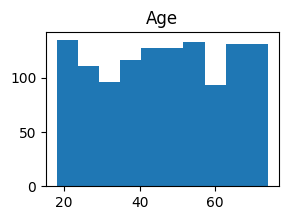

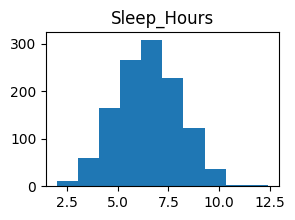

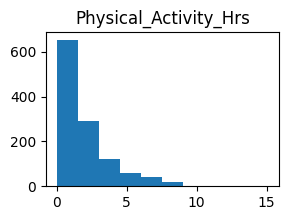

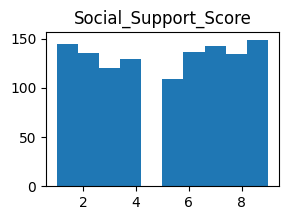

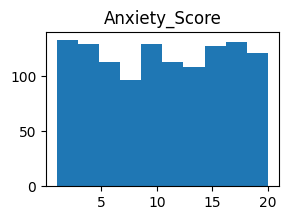

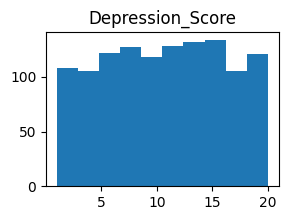

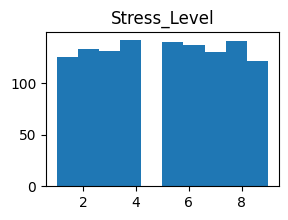

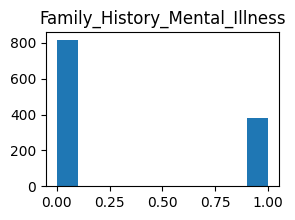

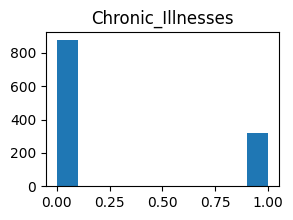

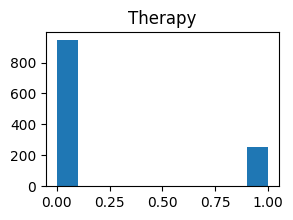

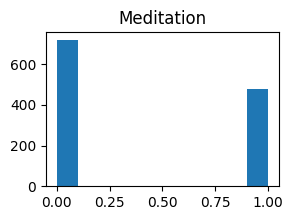

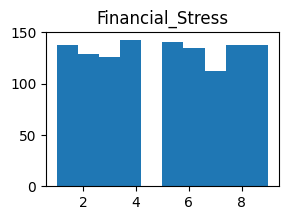

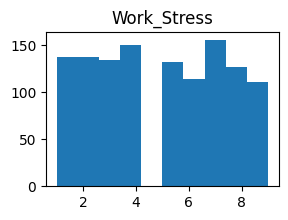

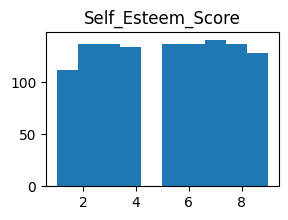

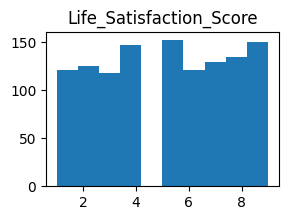

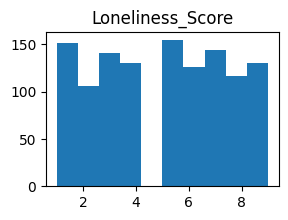

In [11]:
# visualizando variaveis númericas
c = df.select_dtypes(include='number').columns
for columns in c:
    plt.figure(figsize=(3,2))
    plt.hist(df[columns])
    plt.title(columns)
    plt.show()


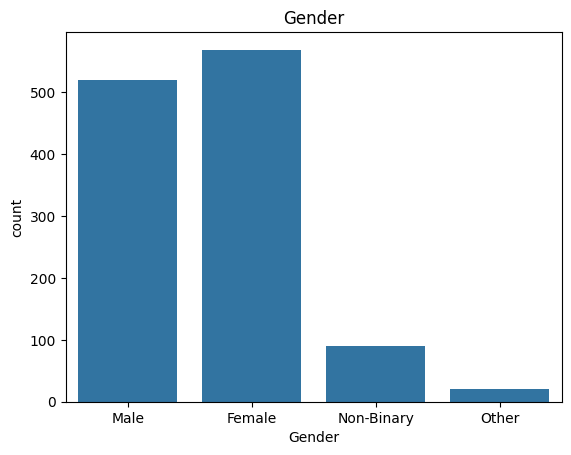

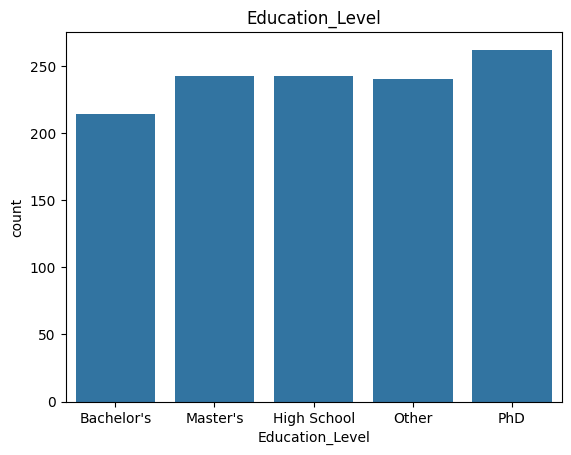

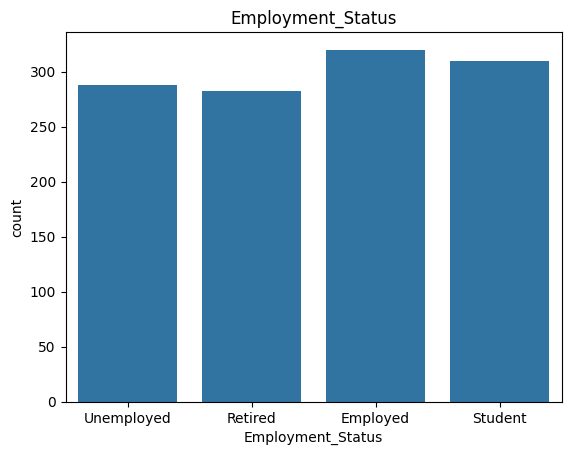

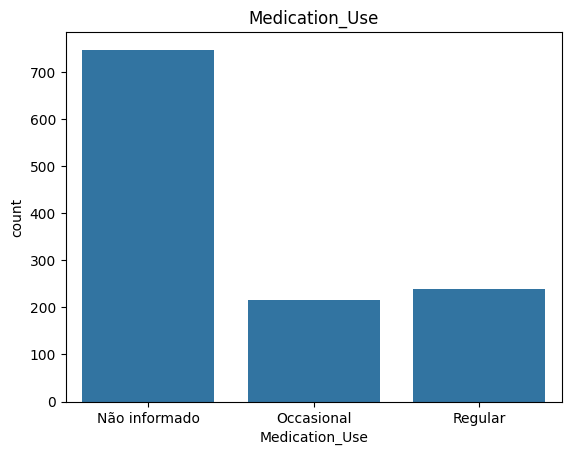

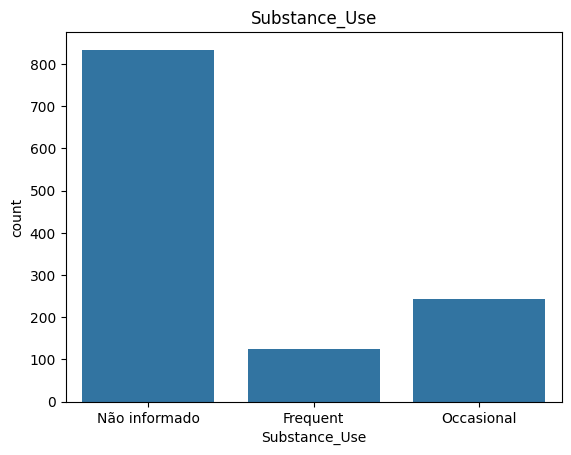

In [12]:
# visualizando variaveis categoricas
c = df.select_dtypes(exclude='number').columns
for columns in c:
    sns.countplot(x=df[columns])
    plt.title(columns)
    plt.show()


<Axes: >

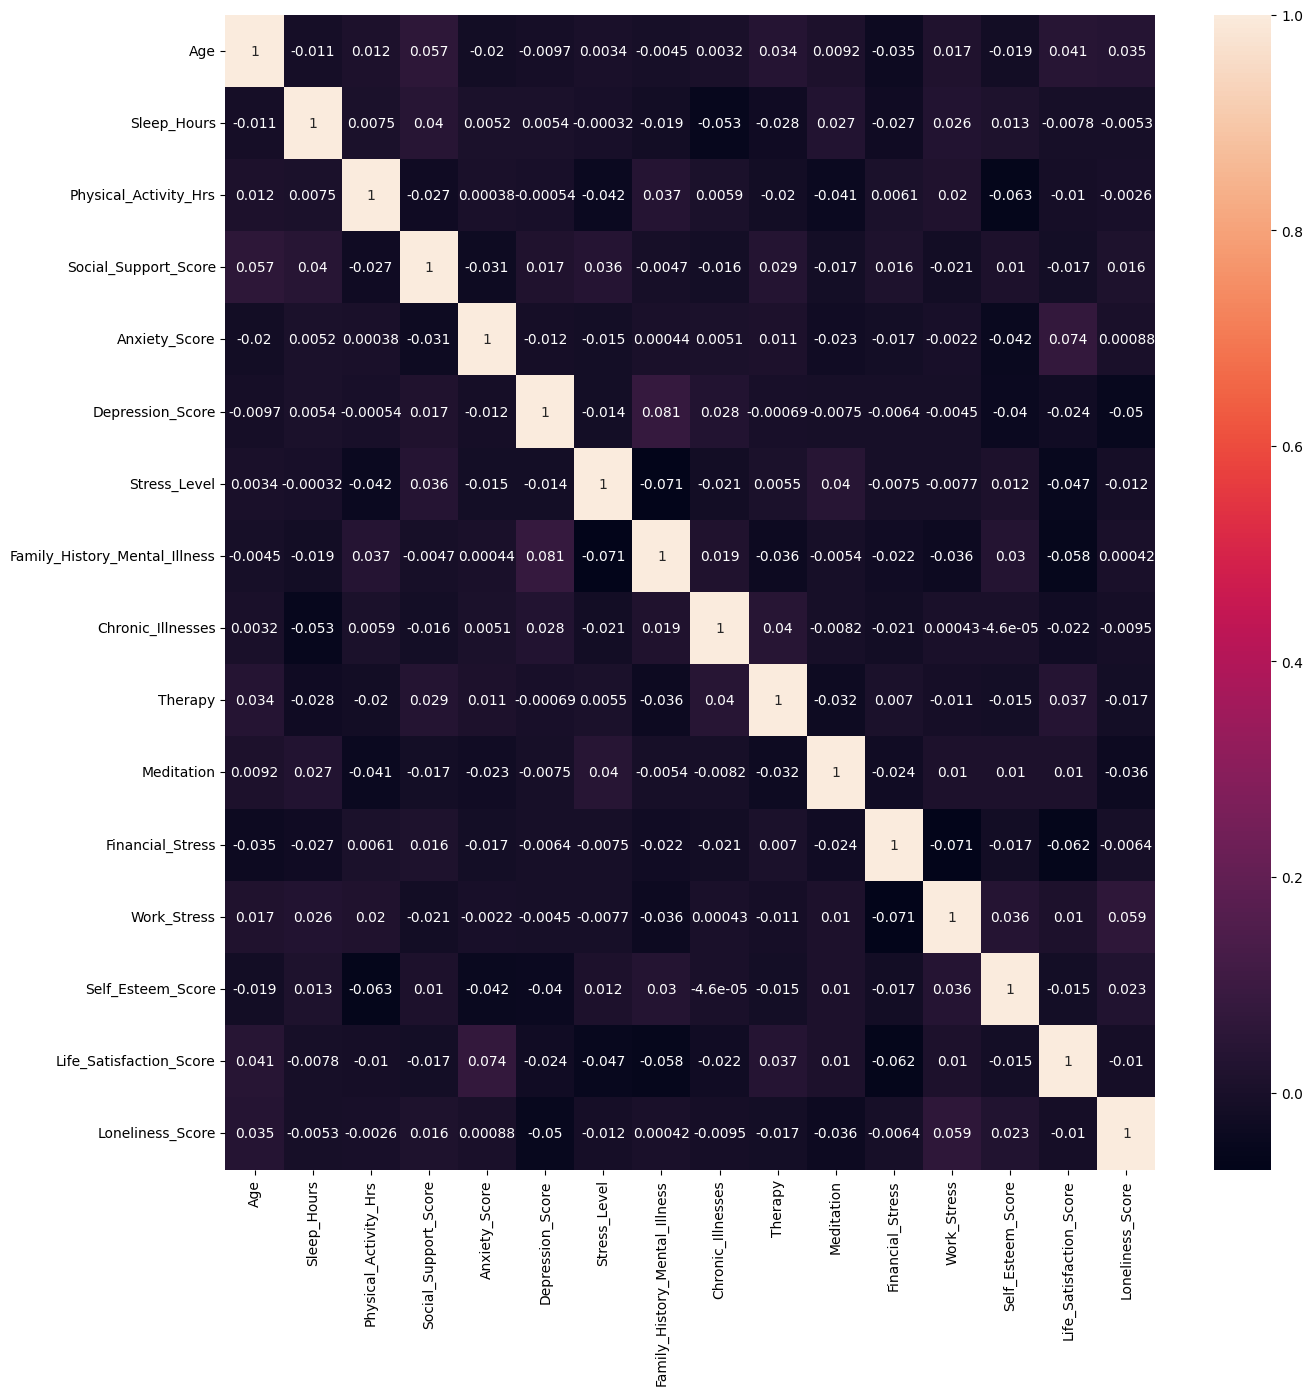

In [13]:
# Verificando coorelação das variaveis númericas
c = df.select_dtypes(include='number')
plt.figure(figsize=(15,15))
sns.heatmap(c.corr(), annot=True)

## Buscando respostas para as perguntas que foram traçadas no objetivo.

- **1 Como a faixa etária e o gênero influenciam os níveis de depressão?** <br> 
Nota-se que até os 30 anos pessoas do gênero masculino, tem maiores scores de depressão em realção aos demais grupos, mas apos os 45 anos, gêneros alternativo (Não binarios/Outros) passam a ter maiores tendencias de alto nivel de depressão (12.5 ~ 15) de Média

- **2 Qual a relação entre horas de sono e os níveis de depressão? Pessoas com menos horas de sono apresentam maiores índices de distúrbios emocionais?**<br> 
Atraves desse conjunto de dados não foi comprovado o impacto de horas de sono com o score de depressão, mas notamos que no intervalo de sono recomendado (6.5 ~ 8.0 Horas de Sono), existe uma menor variancia dos dados

- **3 Como o histórico familiar de doenças mentais afeta os índices de ansiedade e depressão nos indivíduos?**

- **4 Terapia e meditação são estratégias eficazes para reduzir os níveis de ansiedade e depressão? Existe alguma diferença nos resultados entre os dois métodos?**

- **5 Como o nível de solidão está relacionado ao bem-estar geral e ao impacto na saúde mental dos indivíduos?**

C:\Users\andre\AppData\Local\Temp\ipykernel_16588\4237800998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perg1.Age = pd.cut(df_perg1.Age, bins =[0,20,30,45,60,80], labels=['0-20', '20-30', '30-45', '45-60', '60-80'])


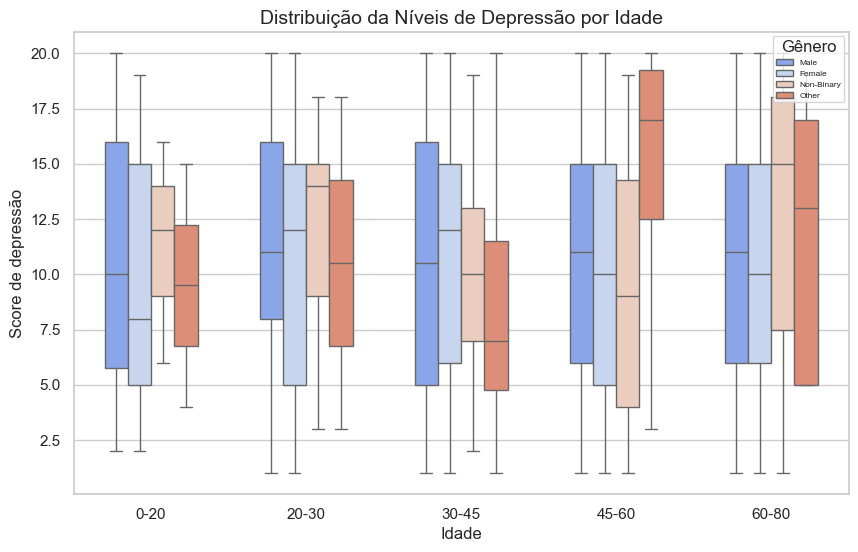

In [75]:
# para a pergunta número 1, bucaremos repostas para os valores das variaveis -> (Depression_Score) nas variaveis -> (Age, Gender)
df_perg1 = df[['Depression_Score','Age','Gender']]
# Colocando os niveis de Sress e Depressão em escalas
df_perg1.Age = pd.cut(df_perg1.Age, bins =[0,20,30,45,60,80], labels=['0-20', '20-30', '30-45', '45-60', '60-80'])
plt.figure(figsize=(10, 6))

# Criando o boxplot
sns.boxplot(
    data=df_perg1, 
    x='Age', 
    y='Depression_Score', 
    hue='Gender',  # Diferencia por gênero
    palette='coolwarm', 
    width=0.6,  # Largura dos boxes
)

# Melhorando os rótulos e o título
plt.title("Distribuição da Níveis de Depressão por Idade", fontsize=14)
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Score de depressão", fontsize=12)
plt.legend(title="Gênero", loc='upper right', fontsize=6)

# Exibir o gráfico
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_16588\2811310648.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


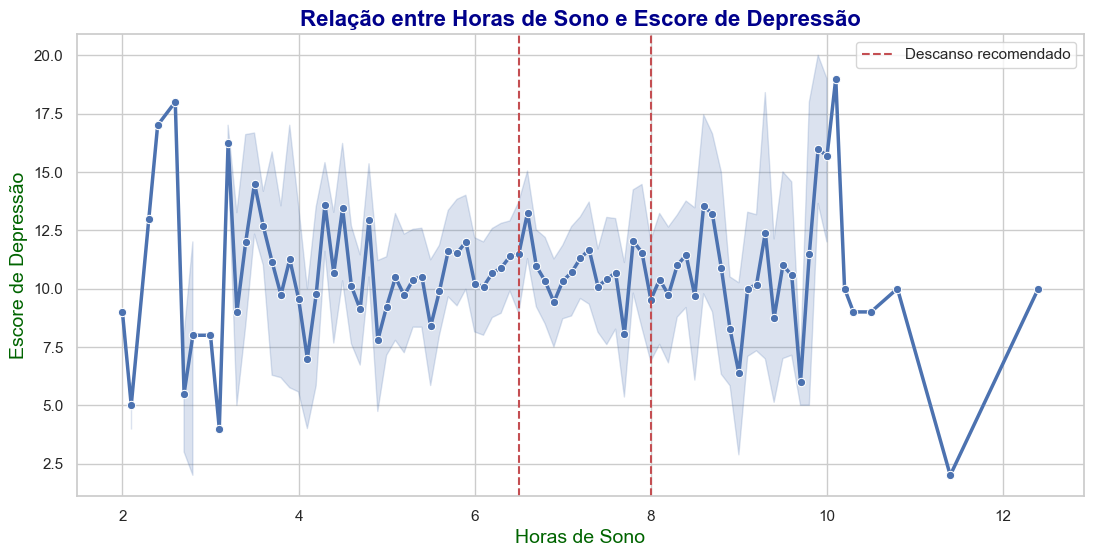

In [73]:
# para a pergunta número 2, bucaremos repostas para os valores das variaveis -> (Stress_Level e Depression_Score) nas variaveis -> (Age, Gender)
df_perg2 = df[['Depression_Score','Sleep_Hours']]
# Definindo um estilo do Seaborn para melhorar a aparência
sns.set(style="whitegrid")  # Estilo mais limpo com grades suaves

# Criando o gráfico de linha com Seaborn
plt.figure(figsize=(13, 6))  # Definindo o tamanho da figura
sns.lineplot(
    data=df_perg2, 
    x='Sleep_Hours', 
    y='Depression_Score', 
    palette='coolwarm',  # Paleta de cores suave, mas com contraste
    linewidth=2.5,  # Espessura da linha
    marker='o',  # Adicionando marcadores nos pontos
    markersize=6,  # Tamanho dos marcadores
    dashes=False  # Linha contínua (não tracejada)
)

# Adicionando título e rótulos
plt.title('Relação entre Horas de Sono e Escore de Depressão', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Horas de Sono', fontsize=14, color='darkgreen')
plt.ylabel('Escore de Depressão', fontsize=14, color='darkgreen')
plt.axvline(x=6.5, color='r', linestyle='--', label='Descanso recomendado')  
plt.axvline(x=8.0, color='r', linestyle='--')  
plt.legend()
plt.show()

In [78]:
df_perg3 = df[['Family_History_Mental_Illness','Depression_Score']]
df_perg3.value_counts()

Family_History_Mental_Illness  Depression_Score
0                              12                  59
                               8                   50
                               13                  50
                               6                   46
                               16                  46
                               15                  46
                               1                   44
                               3                   42
                               19                  42
                               7                   41
                               5                   40
                               10                  40
                               9                   39
                               4                   38
                               20                  38
                               2                   34
                               14                  32
                               11 